In [1]:
cd /orange/adamginsburg/w51/gtc/parker/FinalMosaics

/orange/adamginsburg/w51/gtc/parker/FinalMosaics


In [2]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import pylab as pl
from astropy import visualization, coordinates, units as u
from astroquery.vizier import Vizier
from photutils import DAOStarFinder
from astropy.wcs.utils import fit_wcs_from_points
import glob
import os
from astropy.visualization import simple_norm

## H PSF

In [13]:
files = !ls *fits
name = files[1]
name

'H_FINAL_MOSAIC.fits'

In [14]:
h_mosaic = fits.open(files[1])
h_data = h_mosaic[0].data

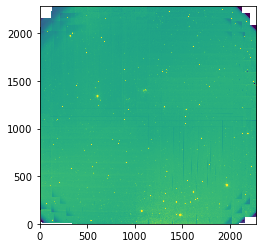

In [31]:
norm = simple_norm(h_data, 'sqrt', percent=99.8)
pl.imshow(h_data, norm=norm, origin='lower')

In [32]:
from photutils import find_peaks
peaks_tbl = find_peaks(h_data, threshold=500.)
peaks_tbl['peak_value'].info.format = '%.8g' #for consistent table output
peaks_tbl

x_peak,y_peak,peak_value
int64,int64,float64
581,0,733.43573
584,0,635.52337
586,0,1026.3367
591,0,928.46581
595,0,677.04229
615,0,3563.4269
627,0,1108.2819
633,0,718.20744
642,0,2751.4984


In [33]:
size = 25
hsize = (size - 1)/2
x = peaks_tbl['x_peak']
y = peaks_tbl['y_peak']
mask = ((x > hsize) & (x < (h_data.shape[1] -1 - hsize)) & (y > hsize) & (y < (h_data.shape[0] -1 - hsize))) 

In [34]:
from astropy.table import Table
stars_tbl = Table()
stars_tbl['x'] = x[mask]
stars_tbl['y'] = y[mask]

In [35]:
from astropy.stats import sigma_clipped_stats
mean_val, median_val, std_val = sigma_clipped_stats(h_data, sigma=2)
h_data -= median_val

In [36]:
from astropy.nddata import NDData
nddata = NDData(data=h_data)

In [37]:
from photutils.psf import extract_stars
stars = extract_stars(nddata, stars_tbl, size=25)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


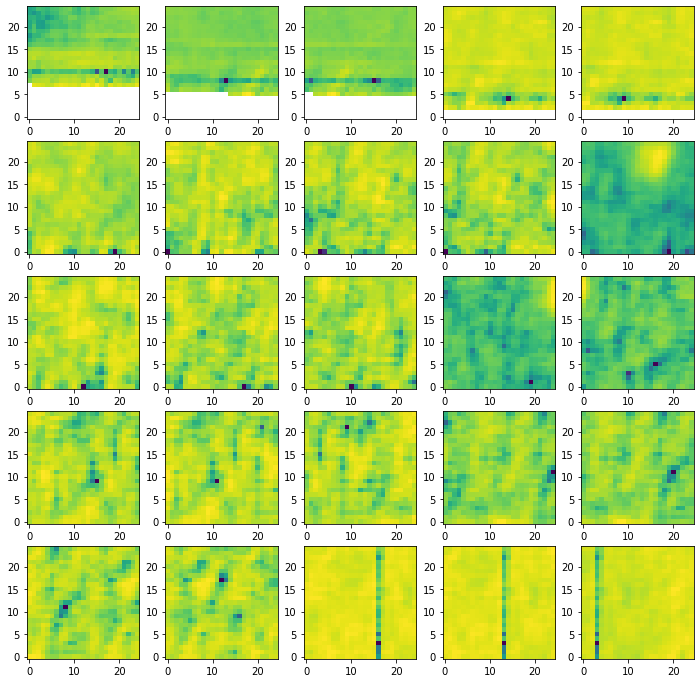

In [38]:
nrows = 5
ncols = 5
fig, ax = pl.subplots(nrows=nrows, ncols=ncols, figsize=(12,12), squeeze=True)

ax = ax.ravel()

for i in range(nrows*ncols):
    norm = simple_norm(stars[i], 'log', percent=99.8)
    ax[i].imshow(stars[i], norm=norm, origin='lower', cmap='viridis')

In [27]:
from photutils import EPSFBuilder
epsf_builder = EPSFBuilder(oversampling=4, maxiters=3, progress_bar=False)
epsf, fitted_stars = epsf_builder(stars)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


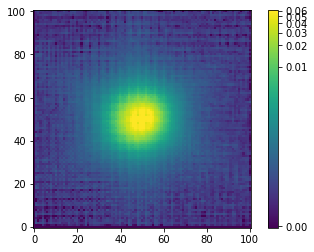

In [28]:
norm = simple_norm(epsf.data, 'log', percent=99.)
pl.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
pl.colorbar()

## H2 PSF

In [3]:
files = !ls *fits
name = files[0]
name

'H2_FINAL_MOSAIC.fits'

In [4]:
h2_mosaic = fits.open(files[0])
h2_data = h2_mosaic[0].data

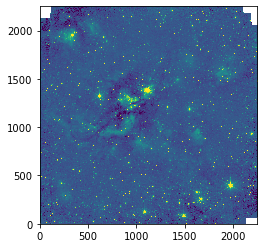

In [5]:
h2_norm = simple_norm(h2_data, 'sqrt', percent=99.)
pl.imshow(h2_data, norm=h2_norm, origin='lower')

In [6]:
from photutils import find_peaks
h2_peaks_tbl = find_peaks(h2_data, threshold=500.)
h2_peaks_tbl['peak_value'].info.format = '%.8g' #for consistent table output
h2_peaks_tbl

x_peak,y_peak,peak_value
int64,int64,float64
987,0,1551.4074
1514,4,810.17396
1813,6,781.23791
874,13,3622.4973
1027,14,5050.9652
71,15,5150.203
67,17,3413.5713
1307,17,644.43557
1781,19,707.63466


In [7]:
size = 25
hsize = (size - 1)/2
x = h2_peaks_tbl['x_peak']
y = h2_peaks_tbl['y_peak']
mask = ((x > hsize) & (x < (h2_data.shape[1] -1 - hsize)) & (y > hsize) & (y < (h2_data.shape[0] -1 - hsize))) 

In [8]:
from astropy.table import Table
stars_tbl = Table()
stars_tbl['x'] = x[mask]
stars_tbl['y'] = y[mask]

In [9]:
from astropy.stats import sigma_clipped_stats
mean_val, median_val, std_val = sigma_clipped_stats(h2_data, sigma=2)
h2_data -= median_val

In [10]:
from astropy.nddata import NDData
nddata = NDData(data=h2_data)

In [11]:
from photutils.psf import extract_stars
h2_stars = extract_stars(nddata, stars_tbl, size=25)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


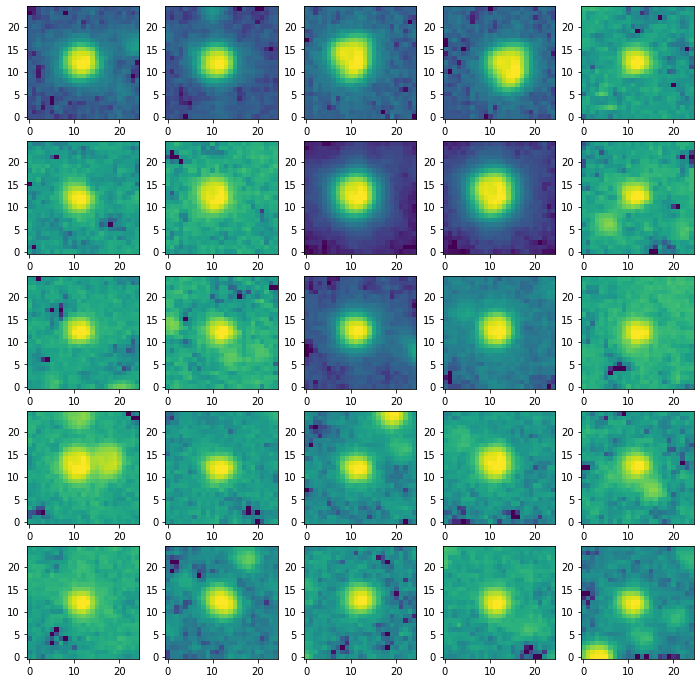

In [12]:
nrows = 5
ncols = 5
fig, ax = pl.subplots(nrows=nrows, ncols=ncols, figsize=(12,12), squeeze=True)

ax = ax.ravel()

for i in range(nrows*ncols):
    norm = simple_norm(h2_stars[i], 'log', percent=99.)
    ax[i].imshow(h2_stars[i], norm=norm, origin='lower', cmap='viridis')

In [13]:
from photutils import EPSFBuilder
epsf_builder = EPSFBuilder(oversampling=4, maxiters=3, progress_bar=False)
h2_epsf, fitted_stars = epsf_builder(h2_stars)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


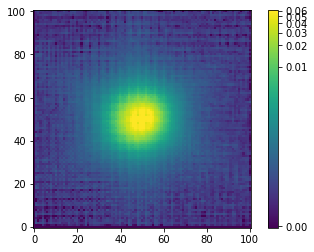

In [14]:
norm = simple_norm(h2_epsf.data, 'log', percent=99.)
pl.imshow(h2_epsf.data, norm=norm, origin='lower', cmap='viridis')
pl.colorbar()

1.3601858030850356

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


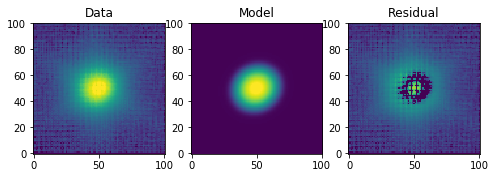

In [15]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

y, x = np.mgrid[:h2_epsf.data.shape[0], :h2_epsf.data.shape[1]]
z = h2_epsf.data

# Fit the data using astropy.modeling
p_init = models.Gaussian2D(x_mean=50, y_mean=50)
fit_p = fitting.LevMarLSQFitter()

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p = fit_p(p_init, x, y, z)

# Plot the data with the best-fit model
plt.figure(figsize=(8, 2.5))
plt.subplot(1, 3, 1)
plt.imshow(z, origin='lower', interpolation='nearest', norm=norm)
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(p(x, y), origin='lower', interpolation='nearest', norm=norm)
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(z - p(x, y), origin='lower', interpolation='nearest', norm=norm)
plt.title("Residual")

p.parameters

h2_sigma = np.sqrt(p.x_stddev.value*p.y_stddev.value)/4
h2_sigma

## J PSF

In [51]:
files = !ls *fits
name = files[2]
name

'J_FINAL_MOSAIC.fits'

In [52]:
j_mosaic = fits.open(files[2])
j_data = j_mosaic[0].data

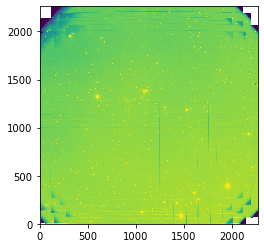

In [53]:
norm = simple_norm(j_data, 'sqrt', percent=99.)
pl.imshow(j_data, norm=norm, origin='lower')

In [54]:
from photutils import find_peaks
peaks_tbl = find_peaks(j_data, threshold=500.)
peaks_tbl['peak_value'].info.format = '%.8g' #for consistent table output
peaks_tbl

x_peak,y_peak,peak_value
int64,int64,float64
210,0,12929.581
263,0,13774.133
276,0,13373.516
284,0,14282.68
290,0,13448.482
325,0,13443.78
330,0,13774.737
335,0,13274.305
340,0,13859.669


In [55]:
size = 25
hsize = (size - 1)/2
x = peaks_tbl['x_peak']
y = peaks_tbl['y_peak']
mask = ((x > hsize) & (x < (j_data.shape[1] -1 - hsize)) & (y > hsize) & (y < (j_data.shape[0] -1 - hsize))) 

In [56]:
from astropy.table import Table
stars_tbl = Table()
stars_tbl['x'] = x[mask]
stars_tbl['y'] = y[mask]

In [57]:
from astropy.stats import sigma_clipped_stats
mean_val, median_val, std_val = sigma_clipped_stats(j_data, sigma=2)
j_data -= median_val

In [58]:
from astropy.nddata import NDData
nddata = NDData(data=j_data)

In [59]:
from photutils.psf import extract_stars
stars = extract_stars(nddata, stars_tbl, size=25)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


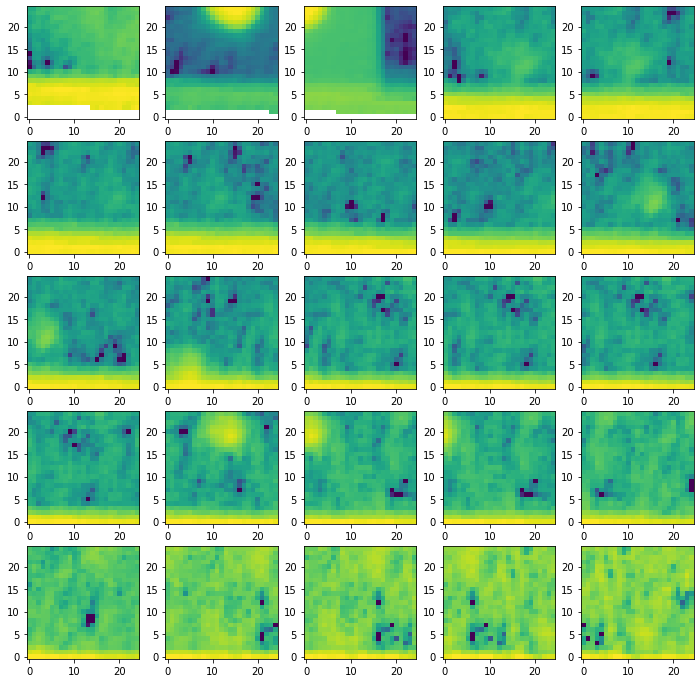

In [60]:
nrows = 5
ncols = 5
fig, ax = pl.subplots(nrows=nrows, ncols=ncols, figsize=(12,12), squeeze=True)

ax = ax.ravel()

for i in range(nrows*ncols):
    norm = simple_norm(stars[i], 'log', percent=99.)
    ax[i].imshow(stars[i], norm=norm, origin='lower', cmap='viridis')

In [48]:
from photutils import EPSFBuilder
epsf_builder = EPSFBuilder(oversampling=4, maxiters=3, progress_bar=False)
epsf, fitted_stars = epsf_builder(stars)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


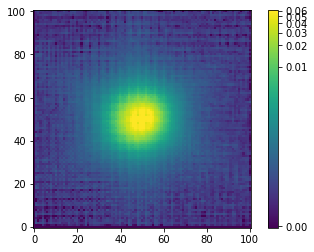

In [49]:
norm = simple_norm(epsf.data, 'log', percent=99.)
pl.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')
pl.colorbar()

## K PSF

In [16]:
files = !ls *fits
name = files[3]
name

'K_FINAL_MOSAIC.fits'

In [17]:
k_mosaic = fits.open(files[3])
k_data = k_mosaic[0].data

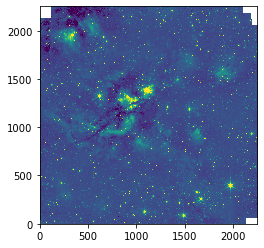

In [18]:
norm = simple_norm(k_data, 'sqrt', percent=99.)
pl.imshow(k_data, norm=norm, origin='lower')

In [19]:
from photutils import find_peaks
peaks_tbl = find_peaks(k_data, threshold=500.)
peaks_tbl['peak_value'].info.format = '%.8g' #for consistent table output
peaks_tbl

x_peak,y_peak,peak_value
int64,int64,float64
1226,0,1270.1728
988,1,2734.6598
1514,4,1066.421
1516,5,802.43586
1814,7,1271.2277
385,8,729.89834
1677,8,661.40612
1067,12,885.88164
1444,12,813.82215


In [20]:
size = 25
hsize = (size - 1)/2
x = peaks_tbl['x_peak']
y = peaks_tbl['y_peak']
mask = ((x > hsize) & (x < (k_data.shape[1] -1 - hsize)) & (y > hsize) & (y < (k_data.shape[0] -1 - hsize))) 

In [21]:
from astropy.table import Table
stars_tbl = Table()
stars_tbl['x'] = x[mask]
stars_tbl['y'] = y[mask]

In [22]:
from astropy.stats import sigma_clipped_stats
mean_val, median_val, std_val = sigma_clipped_stats(k_data, sigma=2)
k_data -= median_val

In [23]:
from astropy.nddata import NDData
nddata = NDData(data=k_data)

In [24]:
from photutils.psf import extract_stars
stars = extract_stars(nddata, stars_tbl, size=25)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


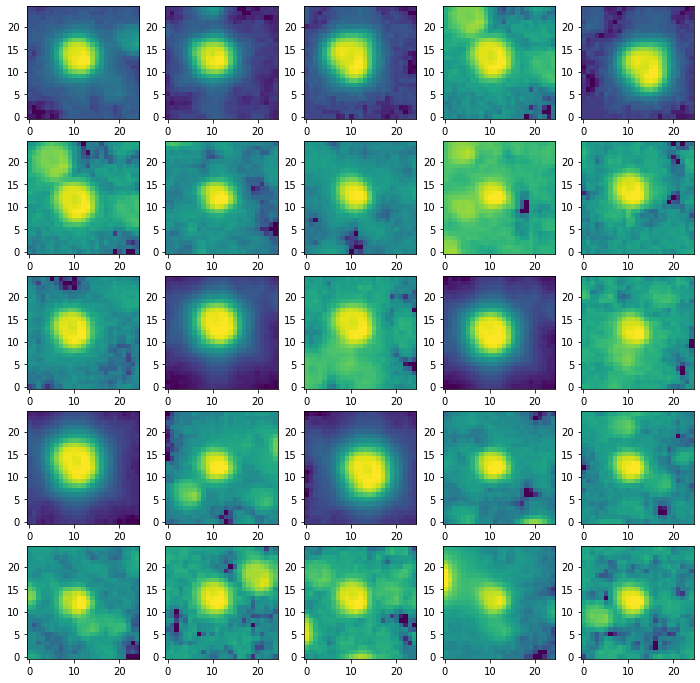

In [25]:
nrows = 5
ncols = 5
fig, ax = pl.subplots(nrows=nrows, ncols=ncols, figsize=(12,12), squeeze=True)

ax = ax.ravel()

for i in range(nrows*ncols):
    norm = simple_norm(stars[i], 'log', percent=99.)
    ax[i].imshow(stars[i], norm=norm, origin='lower', cmap='viridis')

In [26]:
from photutils import EPSFBuilder
epsf_builder = EPSFBuilder(oversampling=4, maxiters=3, progress_bar=False)
k_epsf, fitted_stars = epsf_builder(stars)

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


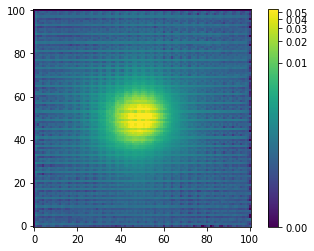

In [27]:
norm = simple_norm(k_epsf.data, 'log', percent=99.)
pl.imshow(k_epsf.data, norm=norm, origin='lower', cmap='viridis')
pl.colorbar()

1.4430711109874275

/orange/adamginsburg/miniconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:285: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)


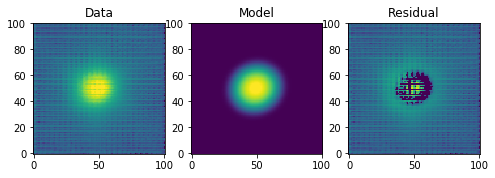

In [28]:
y, x = np.mgrid[:k_epsf.data.shape[0], :k_epsf.data.shape[1]]
z = k_epsf.data

# Fit the data using astropy.modeling
p_init = models.Gaussian2D(x_mean=50, y_mean=50)
fit_p = fitting.LevMarLSQFitter()

with warnings.catch_warnings():
    # Ignore model linearity warning from the fitter
    warnings.simplefilter('ignore')
    p = fit_p(p_init, x, y, z)

# Plot the data with the best-fit model
plt.figure(figsize=(8, 2.5))
plt.subplot(1, 3, 1)
plt.imshow(z, origin='lower', interpolation='nearest', norm=norm)
plt.title("Data")
plt.subplot(1, 3, 2)
plt.imshow(p(x, y), origin='lower', interpolation='nearest', norm=norm)
plt.title("Model")
plt.subplot(1, 3, 3)
plt.imshow(z - p(x, y), origin='lower', interpolation='nearest', norm=norm)
plt.title("Residual")

p.parameters

k_sigma = np.sqrt(p.x_stddev.value*p.y_stddev.value)/4
k_sigma

## Photometry

In [30]:
from photutils.detection import IRAFStarFinder
from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.background import MMMBackground, MADStdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm

## H2 Photometry

In [31]:
bkgrms = MADStdBackgroundRMS()
std = bkgrms(h2_data)
iraffind = IRAFStarFinder(threshold=3.5*std,
                          fwhm=h2_sigma*gaussian_sigma_to_fwhm,
                          minsep_fwhm=0.01, roundhi=5.0, roundlo=-5.0,
                          sharplo=0.0, sharphi=2.0)
daogroup = DAOGroup(2.0*h2_sigma*gaussian_sigma_to_fwhm)
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = h2_epsf
from photutils.psf import IterativelySubtractedPSFPhotometry
h2_photometry = IterativelySubtractedPSFPhotometry(finder=iraffind,group_maker=daogroup,bkg_estimator=mmm_bkg,
                                                psf_model=psf_model, aperture_radius=h2_sigma,
                                                fitter=LevMarLSQFitter(),
                                                niters=1, fitshape=(11,11))
h2_result_tab = h2_photometry(image=h2_data)


In [32]:
h2_residual_image = h2_photometry.get_residual_image()

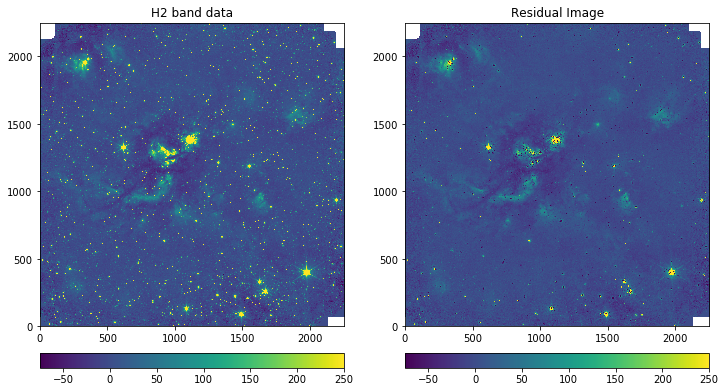

In [33]:
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(h2_data, cmap='viridis', aspect=1, interpolation='nearest',
           origin='lower', vmin=-75, vmax=250)
plt.title('H2 band data')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.subplot(1 ,2, 2)
plt.imshow(h2_residual_image, cmap='viridis', aspect=1, 
           interpolation='nearest', origin='lower', vmin=-75, vmax=250)
plt.title('Residual Image')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.show()

In [34]:
h2_result_tab

x_0,x_fit,y_0,y_fit,flux_0,flux_fit,id,group_id,flux_unc,x_0_unc,y_0_unc,iter_detected
float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int32
106.33545587014345,106.33545587014345,0.3546898104442029,0.3546898104442029,-2.9677091442332184,-2.9677091442332184,1,1,2.3365761736691e-310,2.3365761736691e-310,2.3365761736691e-310,1
113.36982807475944,113.36982807475944,0.41868784700385886,0.41868784700385886,107.6545162380216,107.6545162380216,2,1,4.68870114579403e-310,4.68868381455614e-310,4.68870115149594e-310,1
122.91296577297663,122.91296577297663,0.4720738502395587,0.4720738502395587,241.4725440346411,241.4725440346411,3,1,0.0,0.0,0.0,1
131.0,131.0,0.9470438550782903,0.9470438550782903,22.686832801986196,22.686832801986196,4,1,0.0,0.0,0.0,1
134.7419899067178,134.7419899067178,0.8221664764541301,0.8221664764541301,41.812334449618845,41.812334449618845,5,1,2.77e-322,2.47e-322,0.8221664764541301,1
138.2222806387397,138.2222806387397,-0.0013338206714381684,-0.0013338206714381684,13.669226979122724,13.669226979122724,6,1,2.4810402583074525e-265,2.4810402583074525e-265,-0.0013338206714381684,1
144.33367154295638,144.33367154295638,1.100190465614495,1.100190465614495,41.934318803610964,41.934318803610964,20,1,-5.21078875209905e+304,nan,1.100190465614495,1
149.77765478219712,149.77765478219712,1.1942229670584785,1.1942229670584785,55.786287535646025,55.786287535646025,21,1,1.2019475308366921e-178,1.20194753083651e-178,1.1942229670584785,1
95.83241641562861,95.83241641562861,2.760956654346519,2.760956654346519,81.94480611628347,81.94480611628347,40,1,8.441652818169799e-227,8.441652818169991e-227,2.760956654346519,1


## K Photometry

In [35]:
bkgrms = MADStdBackgroundRMS()
std = bkgrms(k_data)
iraffind = IRAFStarFinder(threshold=3.5*std,
                          fwhm=k_sigma*gaussian_sigma_to_fwhm,
                          minsep_fwhm=0.01, roundhi=5.0, roundlo=-5.0,
                          sharplo=0.0, sharphi=2.0)
daogroup = DAOGroup(2.0*k_sigma*gaussian_sigma_to_fwhm)
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = k_epsf
from photutils.psf import IterativelySubtractedPSFPhotometry
k_photometry = IterativelySubtractedPSFPhotometry(finder=iraffind,group_maker=daogroup,bkg_estimator=mmm_bkg,
                                                psf_model=psf_model, aperture_radius=k_sigma,
                                                fitter=LevMarLSQFitter(),
                                                niters=1, fitshape=(11,11))
k_result_tab = k_photometry(image=k_data)
k_residual_image = k_photometry.get_residual_image()

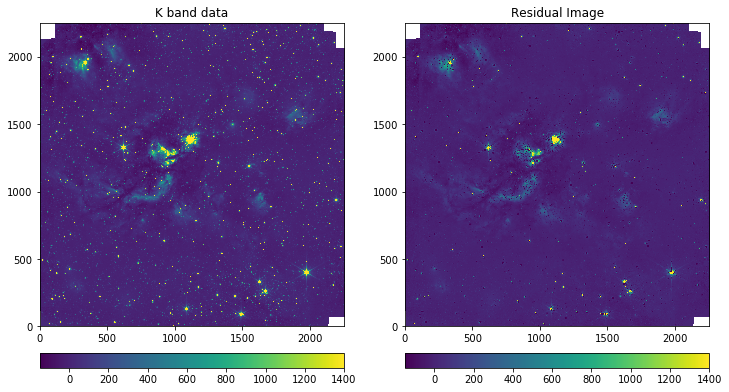

In [36]:
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(k_data, cmap='viridis', aspect=1, interpolation='nearest',
           origin='lower', vmin=-150, vmax=1400)
plt.title('K band data')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.subplot(1 ,2, 2)
plt.imshow(k_residual_image, cmap='viridis', aspect=1, 
           interpolation='nearest', origin='lower', vmin=-150, vmax=1400)
plt.title('Residual Image')
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.04)
plt.show()

In [37]:
k_result_tab

x_0,x_fit,y_0,y_fit,flux_0,flux_fit,id,group_id,flux_unc,x_0_unc,y_0_unc,iter_detected
float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int32
74.85522898746227,74.85522898746227,0.13742942064739871,0.13742942064739871,304.40323448190986,304.40323448190986,1,1,304.40323448190986,304.40323448190986,304.40323448190986,1
79.42236248306256,79.42236248306256,0.4976047157050427,0.4976047157050427,203.58007361853154,203.58007361853154,2,1,203.58007361853154,203.58007361853154,203.58007361853154,1
83.68335971722709,83.68335971722709,0.4708665734759716,0.4708665734759716,253.81176061250812,253.81176061250812,3,1,253.81176061250812,253.81176061250812,253.81176061250812,1
90.35594245763865,90.35594245763865,0.32255522894466715,0.32255522894466715,206.94034960901658,206.94034960901658,4,1,206.94034960901658,206.94034960901658,206.94034960901658,1
1088.1225886920927,1090.783905863092,0.2984672244919091,-0.661600633458068,329.2575544614657,1598.412579971741,5,2,546.9482232919427,0.3072578455893634,0.1018494368797588,1
1226.1052724378505,1226.7323385236164,0.2613101793842705,-1.8913994699579666,4947.8964782509265,62780.43878680839,6,3,1306.645763689332,0.04780145199380029,0.015660780638775396,1
1609.5667058401464,1609.3017204067557,0.33851330537537194,0.5293717252564775,290.0819760765219,259.08676246537954,7,4,201.31738244415044,0.7905740007941854,1.763754482318339,1
1612.3826348947312,1611.6603739185184,0.2911647366844745,0.5093378609364636,315.7246377150629,838.8757354836414,8,4,402.4211275724645,0.26951018123290227,0.7521111478830674,1
1660.465686875868,1659.8295595049015,0.3402035444096416,0.050610001609189506,261.88542111624304,1123.813377528833,9,5,246.18149125991545,0.14415467392239154,0.09632817337748073,1


In [38]:
path = '/orange/adamginsburg/w51/gtc/parker/FinalMosaics'

h2_header = h2_mosaic[0].header

fits.writeto(f'{path}/H2_POST_PHOT_RESID_IMAGE.fits', h2_residual_image, h2_header, overwrite=True)

In [39]:
cd /orange/adamginsburg/w51/gtc/parker/FinalMosaics

/orange/adamginsburg/w51/gtc/parker/FinalMosaics


In [43]:
files = !ls *fits

image = fits.open(files[1])
image

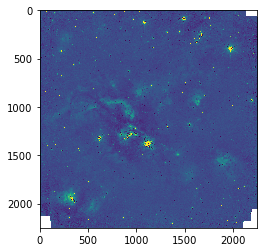

In [45]:
pl.imshow(image[0].data, vmin=-75, vmax=250)

In [46]:
k_header = k_mosaic[0].header

fits.writeto(f'{path}/K_POST_PHOT_RESID_IMAGE.fits', k_residual_image, k_header, overwrite=True)

In [48]:
from astropy.io import ascii

ascii.write(h2_result_tab, 'H2_PHOTOMETRY_RESULTS.dat')

In [49]:
ascii.write(k_result_tab, 'K_PHOTOMETRY_RESULTS.dat')